<a href="https://colab.research.google.com/github/ArshockAbedan/ML2021/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import gzip
import numpy as np
import pandas as pd
from time import time

from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.datasets as datasets
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [61]:
def read_mnist(images_path: str, labels_path: str):
    with gzip.open(labels_path, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path,'rb') as imagesFile:
        length = len(labels)
        # Load flat 28x28 px images (784 px), and convert them to 28x28 px
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
                        .reshape(length, 784) \
                        .reshape(length, 28, 28, 1)
        
    return features, labels

In [62]:
train = {}
test = {}

train['features'], train['labels'] = read_mnist('/content/Data/train-images-idx3-ubyte.gz', '/content/Data/train-labels-idx1-ubyte.gz')
test['features'], test['labels'] = read_mnist('/content/Data/t10k-images-idx3-ubyte.gz', '/content/Data/t10k-labels-idx1-ubyte.gz')

Explore Data

In [63]:
print('# of training images:', train['features'].shape[0])
print('# of test images:', test['features'].shape[0])

# of training images: 60000
# of test images: 10000


Display some images

In [64]:
def display_image(position):
    image = train['features'][position].squeeze()
    plt.title('Example %d. Label: %d' % (position, train['labels'][position]))
    plt.imshow(image, cmap=plt.cm.gray_r)

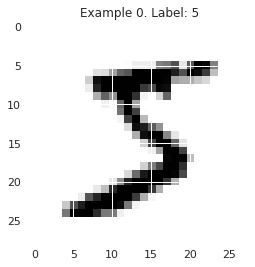

In [65]:
display_image(0)

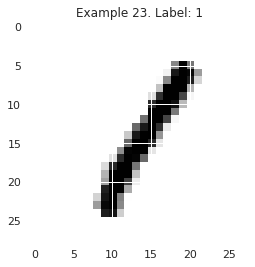

In [66]:
display_image(23)

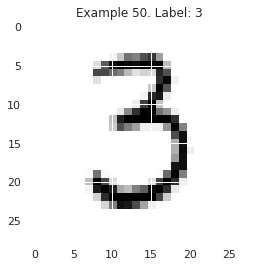

In [67]:
display_image(50)

Plot training data

In [68]:
train_labels_count = np.unique(train['labels'], return_counts=True)
dataframe_train_labels = pd.DataFrame({'Label':train_labels_count[0], 'Count':train_labels_count[1]})
dataframe_train_labels

,Label,Count
0,0,5923
1,1,6742
2,2,5958
3,3,6131
4,4,5842
5,5,5421
6,6,5918
7,7,6265
8,8,5851
9,9,5949


Split training data into training and validation

In [69]:
validation = {}
train['features'], validation['features'], train['labels'], validation['labels'] = train_test_split(train['features'], train['labels'], test_size=0.2, random_state=0)

In [70]:
print('# of training images:', train['features'].shape[0])
print('# of validation images:', validation['features'].shape[0])

# of training images: 48000
# of validation images: 12000


Prepare our input features

In [85]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=48, activation='relu'))
model.add(layers.Dense(units=10, activation = 'softmax'))

In [86]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 6)         60        
                                                                 
 average_pooling2d_8 (Averag  (None, 13, 13, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_14 (Conv2D)          (None, 11, 11, 16)        880       
                                                                 
 average_pooling2d_9 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 3, 8)           1160      
                                                                 
 average_pooling2d_10 (Avera  (None, 1, 1, 8)         

In [87]:
model.compile(loss=losses.categorical_crossentropy, 
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [88]:
EPOCHS = 10
BATCH_SIZE = 128

In [89]:
X_train, y_train = train['features'], to_categorical(train['labels'])
X_validation, y_validation = validation['features'], to_categorical(validation['labels'])

train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_validation, y_validation, batch_size=BATCH_SIZE)

In [90]:
print('# of training images:', train['features'].shape[0])
print('# of validation images:', validation['features'].shape[0])

steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_validation.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_generator, validation_steps=validation_steps, 
                    shuffle=True, callbacks=[tensorboard])

# of training images: 48000
# of validation images: 12000
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # Remove the CWD from sys.path while we load stuff.


375/375 [==============================] - 3s 6ms/step - loss: 0.5559 - accuracy: 0.8190 - val_loss: 0.2987 - val_accuracy: 0.9007
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2105 - accuracy: 0.9362 - val_loss: 0.1631 - val_accuracy: 0.9473
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1621 - accuracy: 0.9500 - val_loss: 0.1477 - val_accuracy: 0.9513
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1466 - accuracy: 0.9556 - val_loss: 0.1365 - val_accuracy: 0.9566
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1268 - accuracy: 0.9612 - val_loss: 0.1186 - val_accuracy: 0.9624
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1201 - accuracy: 0.9624 - val_loss: 0.1599 - val_accuracy: 0.9514
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1069 - accuracy: 0.9675 - val_loss: 0.1313 - val_accuracy: 0.9591
Epoch 8/10
375/37

Test Phase:

In [91]:
score = model.evaluate(test['features'], to_categorical(test['labels']))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0969 - accuracy: 0.9716
Test loss: 0.09687597304582596
Test accuracy: 0.9715999960899353


In [92]:
model.save('/content/Models/my_mnist_model')

INFO:tensorflow:Assets written to: /content/Models/my_mnist_model/assets
